In [1]:
using JLD
using PyPlot
using Statistics
using StatsBase 
using LinearAlgebra
using KernelDensity

In [2]:
using JLD2
using FileIO

In [3]:
function reduce_bins(x::AbstractArray, y::AbstractArray, δ::Integer)
    if length(x) == length(y)
        x_new = [x[i] for i in 1:δ:length(x)]
        y_new = [mean(y[i:(i+δ-1>length(y) ? length(y) : i+δ-1 )]) for i in 1:δ:length(y)]
        return vcat(x_new, [maximum(x)+1]), vcat(y_new, [0])
    else
        @warn "Dims Error"
    end
end

function reduced_steps(hist::H, δ::Integer) where {H<:Histogram}
    x = hist.edges[1][1:end-1]
    y = hist.weights
    return reduce_bins(x, y, δ)
end

reduced_steps (generic function with 1 method)

In [4]:
data = load("../data/experiment/images.jld")

Dict{String,Any} with 5 entries:
  "ImagesIS2"   => [0 0 … 0 0; 0 0 … 0 0; … ; 43 33 … 35 15; 23 140 … 44 28]…
  "ImagesBTV50" => [10 3 … 0 0; 3 0 … 0 0; … ; 6 0 … 0 0; 4 0 … 0 0]…
  "charge"      => [0.1298, 0.1712, 0.095, 0.0433, 0.097, 0.136, 0.1404, 0.1837…
  "ImagesBTV26" => [81 24 … 14 0; 70 49 … 37 0; … ; 38 54 … 23 3; 69 22 … 23 4]…
  "ImagesBTV53" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 21 0; 0 0 … 0 0]…

In [5]:
cam_4 = data["ImagesIS2"]
charge  = data["charge"]

enumerate_events = collect(1:length(charge));

## Cam 4:

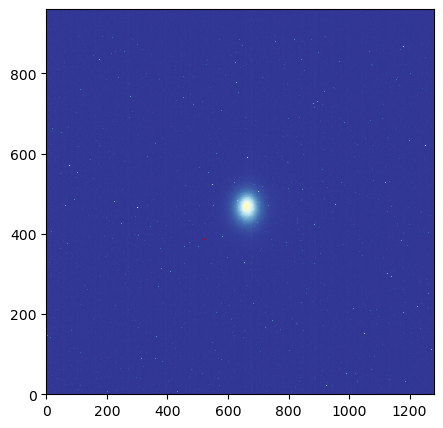

PyObject <matplotlib.collections.QuadMesh object at 0x7fabccb362e0>

In [6]:
tmpp = cam_4[200,:,:];

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.pcolormesh(tmpp, cmap="RdYlBu_r")

In [7]:
img_tmp = zeros(Int64, 958, 320, 426)

for ind in 1:958, x in 1:320, y in 1:426
    img_tmp[ind, x, y] = round(Int64, mean(cam_4[ind, (x-1)*3+1:(x-1)*3+3,(y-1)*3+1:(y-1)*3+3] ))
end

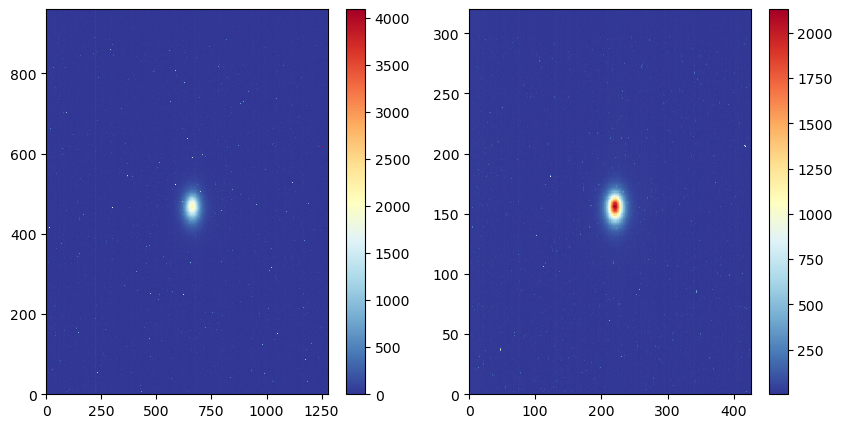

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa8c03304c0>

In [8]:
fig, (ax, ax_2) = plt.subplots(1,2, figsize=(10,5))

cb1 = ax.pcolormesh(cam_4[200,:,:], cmap="RdYlBu_r")
cb2 = ax_2.pcolormesh(img_tmp[200,:,:], cmap="RdYlBu_r")

fig.colorbar(cb1, ax=ax)
fig.colorbar(cb2, ax=ax_2)

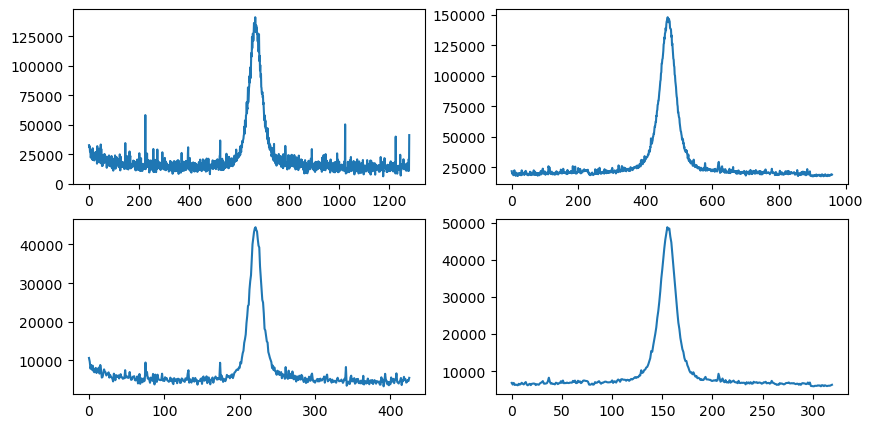

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa8bf723970>

In [9]:
fig, ax = plt.subplots(2,2, figsize=(10,5))

ax[1].plot( sum(cam_4[200,:,:], dims=1)[1,:] )
ax[2].plot( sum(img_tmp[200,:,:], dims=1)[1,:] )

ax[3].plot( sum(cam_4[200,:,:], dims=2)[:,1] )
ax[4].plot( sum(img_tmp[200,:,:], dims=2)[:,1] )

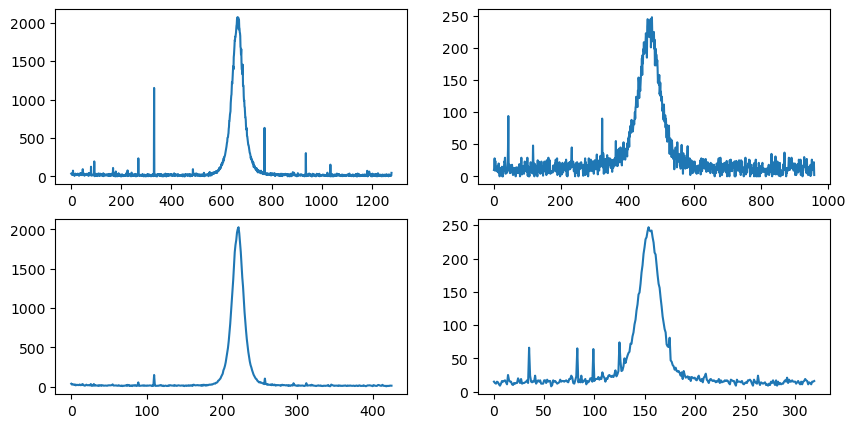

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa8bfee18b0>

In [10]:
fig, ax = plt.subplots(2,2, figsize=(10,5))

ax[1].plot( cam_4[200,155*3,:])
ax[2].plot( img_tmp[200,155,:])

ax[3].plot( cam_4[200,:,240*3])
ax[4].plot( img_tmp[200,:,240])

In [11]:
cam_4 = deepcopy(img_tmp);

In [12]:
sum_over_y = sum(cam_4, dims=2)[:,1,:]
sum_over_x = sum(cam_4, dims=3)[:,:,1]

y_max = argmax(sum(sum_over_x, dims=1)[1,:])
x_max = argmax(sum(sum_over_y, dims=1)[1,:])

δ = 35

y_range = (y_max-δ, y_max+δ)
x_range = (x_max-δ, x_max+δ)

(187, 257)

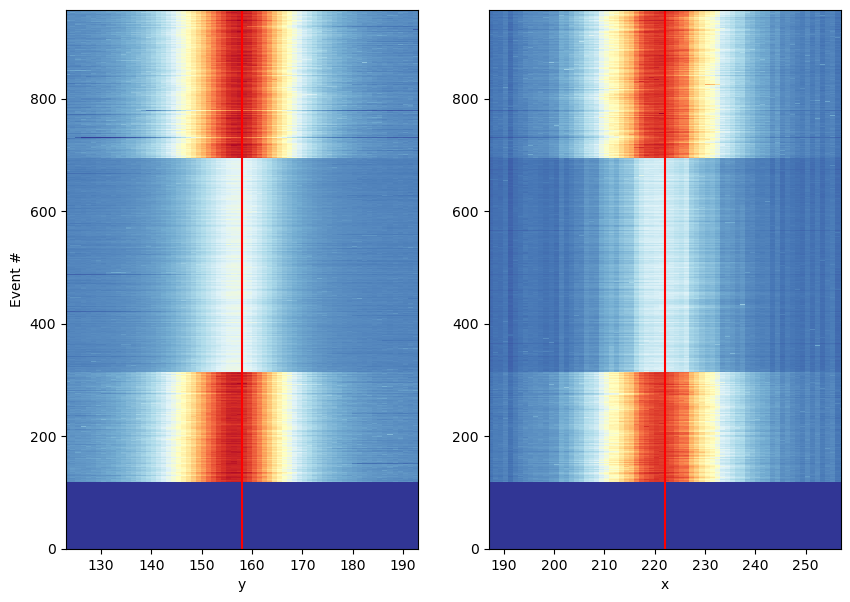

(187.0, 257.0)

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[1].pcolormesh(sum_over_x, cmap="RdYlBu_r")
ax[2].pcolormesh(sum_over_y, cmap="RdYlBu_r")

ax[1].axvline([y_max], color="red")
ax[2].axvline([x_max], color="red")

ax[1].set_xlabel("y")
ax[2].set_xlabel("x")
ax[1].set_ylabel("Event #")

ax[1].set_xlim(y_range[1], y_range[2])
ax[2].set_xlim(x_range[1], x_range[2])

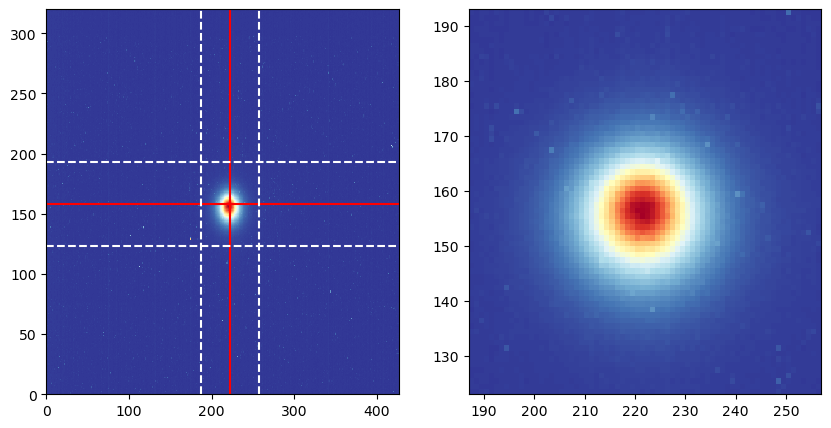

(123.0, 193.0)

In [14]:
fig, (ax, ax_2) = plt.subplots(1,2, figsize=(10,5))

ax.pcolormesh(cam_4[200,:,:], cmap="RdYlBu_r")
ax_2.pcolormesh(cam_4[200,:,:], cmap="RdYlBu_r")

ax.axvline([x_max], color="red")
ax.axhline([y_max], color="red")

ax.axvline([x_range[1]], color="white", ls="--")
ax.axvline([x_range[2]], color="white", ls="--")
ax.axhline([y_range[1]], color="white", ls="--")
ax.axhline([y_range[2]], color="white", ls="--")

ax_2.set_xlim(x_range)
ax_2.set_ylim(y_range)

In [15]:
cam_4_frame = (x=x_range, y=y_range)

(x = (187, 257), y = (123, 193))

# 1. Measurements with Small Charge: 

In [ ]:
event_mask = 5. .< charge .< 15.

# data_m1 = Dict(
#     "cam_1" => cam_1[event_mask,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]], 
#     "cam_2" => cam_2[event_mask,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]], 
#     "cam_3" => cam_3[event_mask,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]], 
#     "cam_4" => cam_4[event_mask,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]],
#     "charge" => charge[event_mask] .* 1.0
# )

# FileIO.save("../data/experiment/dataset_2/m1/images.jld2", data_m1)
# images = load("../data/experiment/dataset_2/m1/images.jld2");

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=(7,7))
# fig.subplots_adjust(hspace=0.2, wspace=0.2)

# ax[1,1].pcolormesh(data_m1["cam_1"][210,:,:], cmap="RdYlBu_r")
# ax[1,2].pcolormesh(data_m1["cam_2"][210,:,:], cmap="RdYlBu_r")
# ax[2,1].pcolormesh(data_m1["cam_3"][210,:,:], cmap="RdYlBu_r")
# ax[2,2].pcolormesh(data_m1["cam_4"][210,:,:], cmap="RdYlBu_r")

## Noise Distribution: 

In [ ]:
# noise: 

bins = 0:1:4096

# 4096 bin is unused - valid are 0:4095

# kde_noise = kde(data_temp[pixel_mask]);

In [ ]:
# Camera 4: 

data_temp = cam_4[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_4 = normalize(histogram_noise, mode=:probability)

histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal_cam_4 = normalize(histogram_signal, mode=:probability);

plt.pcolormesh(pixel_mask[3,:,:])

In [ ]:
histogram_noise.edges[1]

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5), )


ax.step(histogram_noise_cam_4.edges[1][1:end-1],  histogram_noise_cam_4.weights, )
ax.step(histogram_signal_cam_4.edges[1][1:end-1],  histogram_signal_cam_4.weights, )

ax.set_xlim(0,100)
ax.set_ylim(0,0.12)

# ax.set_yscale("log")

# 2. Measurements with Large Charge: 

In [16]:
event_mask = charge .> 15.

# data_m2 = Dict(
#     "cam_1" => cam_1[event_mask,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]], 
#     "cam_2" => cam_2[event_mask,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]], 
#     "cam_3" => cam_3[event_mask,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]], 
#     "cam_4" => cam_4[event_mask,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]],
#     "charge" => charge[event_mask] .* 1.0
# )

# FileIO.save("../data/experiment/dataset_2/m2/images.jld2", data_m2)
# images = load("../data/experiment/dataset_2/m1/images.jld2");

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=(7,7))
# fig.subplots_adjust(hspace=0.2, wspace=0.2)

# ax[1,1].pcolormesh(data_m2["cam_1"][210,:,:], cmap="RdYlBu_r")
# ax[1,2].pcolormesh(data_m2["cam_2"][210,:,:], cmap="RdYlBu_r")
# ax[2,1].pcolormesh(data_m2["cam_3"][210,:,:], cmap="RdYlBu_r")
# ax[2,2].pcolormesh(data_m2["cam_4"][210,:,:], cmap="RdYlBu_r")

## Noise Distribution: 

In [17]:
bins = 0:1:4096

0:1:4096

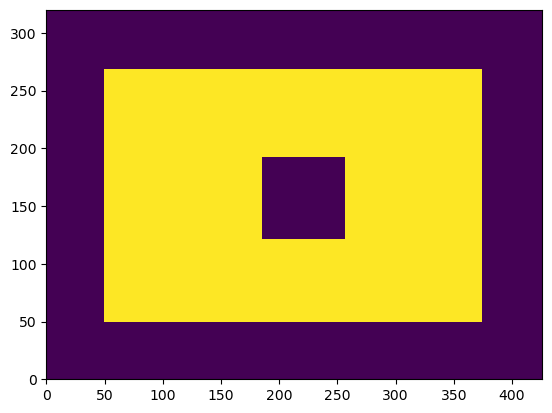

In [18]:
# Camera 4: 

data_temp = cam_4[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .= false

plt.pcolormesh(pixel_mask[3,:,:])

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_4 = normalize(histogram_noise, mode=:probability)

pixel_mask = falses(size(data_temp))
pixel_mask[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .= true

histogram_signal = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_signal_cam_4 = normalize(histogram_signal, mode=:probability);

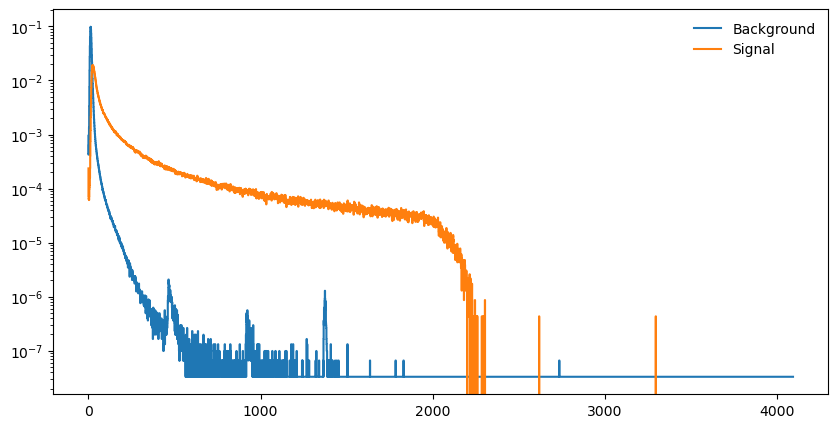

PyObject <matplotlib.legend.Legend object at 0x7fa6c0da0040>

In [48]:
fig, ax = plt.subplots(1,1, figsize=(10,5), )

ax.step(histogram_noise_cam_4.edges[1][1:end-1],  histogram_noise_cam_4.weights, label="Background")
ax.step(histogram_signal_cam_4.edges[1][1:end-1],  histogram_signal_cam_4.weights,  label="Signal")

# ax.set_xlim(0,100)
# ax.set_ylim(0,0.12)

ax.set_yscale("log")

ax.legend(loc="upper right", ncol=1, framealpha=0.0)

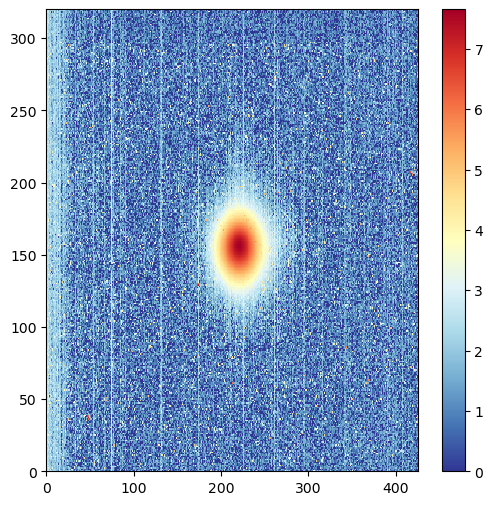

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa87f660d30>

In [20]:
dt_tmp = cam_4[200,:,:] .- argmax(histogram_noise_cam_4.weights)

fig, ax = plt.subplots(1,1, figsize=(6,6))

cb1 = ax.pcolormesh(log.(abs.(dt_tmp)), cmap="RdYlBu_r")

fig.colorbar(cb1, ax=ax)

In [21]:
minimum(dt_tmp)

-11

# CV Matrix IS: 

In [22]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP
using ImageFiltering

using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT 

In [ ]:
# Load Version

# background_hist_2 = load("../data/experiment/dataset_2/m2/background.jld2")
# tmp_histogram = background_hist_2["cam_4"]

# images = load("../data/experiment/dataset_2/m2/images.jld2");

# event_number = 2

# event = (
#     cam_1 = images["cam_1"][event_number,:,:],
#     cam_2 = images["cam_2"][event_number,:,:],
#     cam_3 = images["cam_3"][event_number,:,:],
#     cam_4 = images["cam_4"][event_number,:,:],
#     population = images["charge"][event_number,:][1],
# )

# data = event.cam_4;

# plt.imshow(data)

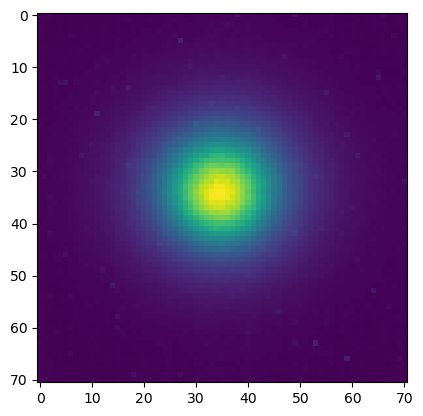

PyObject <matplotlib.image.AxesImage object at 0x7fa811ead7f0>

In [23]:
# Current version 

event_number = 2

tmp_histogram = histogram_noise_cam_4
data = cam_4[event_mask,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]][event_number,:,:]

plt.imshow(data)

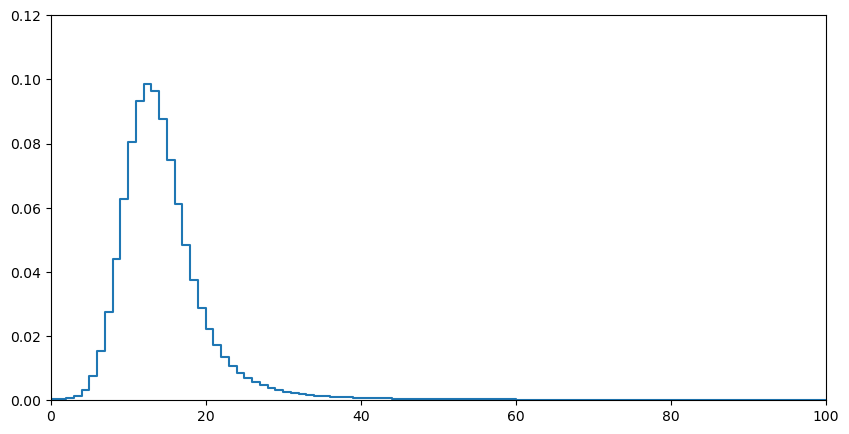

(0.0, 0.12)

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,5), )


ax.step(tmp_histogram.edges[1][1:end-1],  tmp_histogram.weights, )

ax.set_xlim(0,100)
ax.set_ylim(0,0.12)

# ax.set_yscale("log")

In [25]:
# copied from 2-ConvolutionMatrix

function cv_constructor(histogram::Histogram; α::Float64=2, n_max::Int64 = 6000)
    
    background_values = histogram.weights
    edges = histogram.edges[1]
    cv_matrix = zeros(Float64, 4096, n_max)
    
    # replace bins with 0 counts
    mask_b = iszero.(background_values)
    non_zero_min = minimum(background_values[.!mask_b])
    background_values[mask_b] .= non_zero_min
    
#     kern_background = KernelFactors.gaussian(3)
#     background_values= imfilter(background_values, kern_background)
    # ***

    # if the signal prediction == 0, then we use only background distribution
    cv_matrix[:,1] .= background_values 
    
    for i in 2:n_max
        signal_vals = cdf.(truncated(Normal(i-1, α*sqrt(i-1)), edges[1], edges[end]), edges)
        signal_vals = diff(signal_vals)
        
        # signal_vals = pdf.(Normal(i-1, α*sqrt(i-1)), h_bins)
        signal_conv = DSP.conv(signal_vals, background_values)[1:4096]
        signal_conv = abs.(signal_conv)
        
        mask = iszero.(signal_conv) # if convolution returns zero - replace it with minimum value 
        min_non_zero = minimum(signal_conv[.!mask])
        
        signal_conv[mask] .= min_non_zero
        
        if sum(signal_conv) < 0 
            signal_conv[end] += 1 - sum(signal_conv)
        elseif sum(signal_conv) > 0 
            signal_conv = signal_conv ./ sum(signal_conv)
        end
        
        cv_matrix[:,i] .= signal_conv 
    end
    
#     Apply convolution filter: 
    kern = KernelFactors.gaussian((3, 3))
    cv_matrix = imfilter(cv_matrix, kern)
    
    for i in 1:n_max
        cv_matrix[:,i] .= cv_matrix[:,i] ./ sum(cv_matrix[:,i]) 
    end
    # Coment out if not needed 
    
    return cv_matrix
end

function pixel_probability(predicted_value::Int64, observed_value::Int64, conv_matrix::Array{Float64,2})
    
    predicted_ind::Int64 = predicted_value + 1
    observed_ind::Int64 = observed_value + 1
    
    return conv_matrix[observed_ind, predicted_ind]
end

pixel_probability (generic function with 1 method)

    0.5 - works only with pedestal 
    3 - 1250 | 1550
    4 - 1350 | 1550
    5 - 1350 | 1550
    6 - 1350 | 1550
    

In [26]:
cv_2_4 = cv_constructor(tmp_histogram, α=6.);

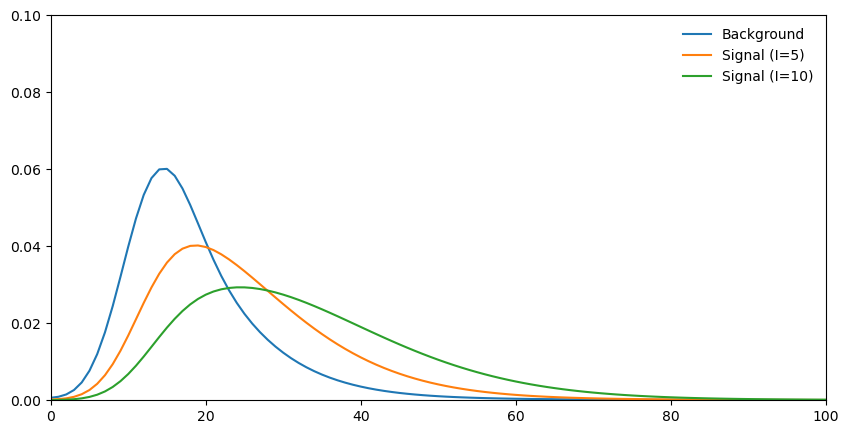

PyObject <matplotlib.legend.Legend object at 0x7fa810748cd0>

In [27]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(cv_2_4[:,1], label="Background")
ax.plot(cv_2_4[:,5], label="Signal (I=5)")

ax.plot(cv_2_4[:,10], label="Signal (I=10)")

ax.set_xlim(0, 100)
ax.set_ylim(0, 0.1)
# ax.set_ylim(0.000000001, 0.05)

ax.legend(loc="upper right", ncol=1, framealpha=0.0)

In [28]:
log_likelihood_3 = let data = data,  c = cv_2_4
    
    params -> begin
        
        image_matrix = zeros(Float64, size(data)...)
        
        max_pred_amp::Int64 = size(c)[2]-1
        log_l::Float64 = 0.0
        
        for pix_ind in CartesianIndices(image_matrix)
    
            x_edge = pix_ind.I[1] 
            y_edge = pix_ind.I[2] 

            pix_prediction::Float64 = cdf(Normal(params.μ_x,params.σ_x), x_edge) - cdf(Normal(params.μ_x,params.σ_x), x_edge - 1)
            pix_prediction *= cdf(Normal(params.μ_y,params.σ_y), y_edge) - cdf(Normal(params.μ_y,params.σ_y), y_edge - 1)

            pix_prediction = pix_prediction*params.i
            
            cv_index = floor(Int64, pix_prediction)

            if cv_index > max_pred_amp
                cv_index = max_pred_amp
            end

            log_l += log(c[data[pix_ind]+1, cv_index+1])
            
        end

    
        return LogDVal(log_l)
        
    end
end

prior = NamedTupleDist(
    μ_x = 20 .. 50,
    μ_y = 20 .. 50,
    σ_x = 3 .. 20,
    σ_y = 3 .. 20,
    i = 1 .. 2^20
    );

In [29]:
posterior = PosteriorDensity(log_likelihood_3, prior);
algorithm = MetropolisHastings()

nsamples = 10^4
nchains = 4

@time samples = bat_sample(posterior, (nsamples, nchains), algorithm,
        max_nsteps = 10^4, max_time = 20).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ I

 49.359426 seconds (34.86 M allocations: 4.932 GiB, 4.81% gc time)


In [30]:
mode_params = mode(samples)[1]

(μ_x = 33.797632901083716, μ_y = 35.39254819786409, σ_x = 10.001286228916566, σ_y = 10.424232859612413, i = 907208.8734999425)

In [31]:
image_reconstructed = zeros(Float64, size(data)...)

for pix_ind in CartesianIndices(image_reconstructed)
    
    x_edge = pix_ind.I[1] 
    y_edge = pix_ind.I[2] 

    pix_prediction::Float64 = cdf(Normal(mode_params.μ_x,mode_params.σ_x), x_edge) - cdf(Normal(mode_params.μ_x,mode_params.σ_x), x_edge - 1)
    pix_prediction *= cdf(Normal(mode_params.μ_y,mode_params.σ_y), y_edge) - cdf(Normal(mode_params.μ_y,mode_params.σ_y), y_edge - 1)

    pix_prediction = pix_prediction*mode_params.i
    image_reconstructed[pix_ind] = pix_prediction
end

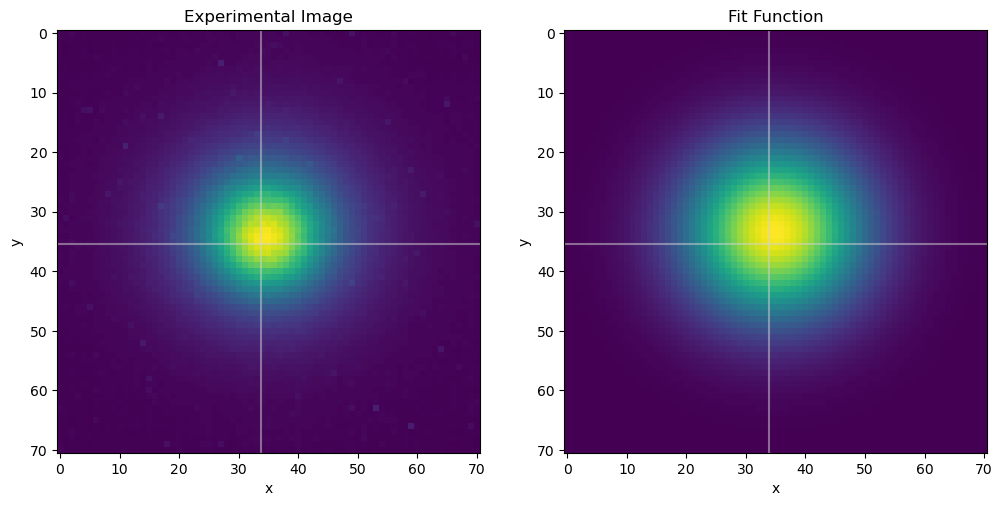

PyObject Text(0.5, 1.0, 'Fit Function')

In [32]:
img, (ax, ax2) = plt.subplots(1,2, figsize=(12,6))

ax.imshow(data)

ax.axvline(mode_params.μ_x, linestyle="-", color="lightgray", alpha=0.5)
ax.axhline(mode_params.μ_y, linestyle="-", color="lightgray", alpha=0.5)

ax2.imshow(image_reconstructed)

ax2.axvline(mode_params.μ_x, linestyle="-", color="lightgray", alpha=0.5)
ax2.axhline(mode_params.μ_y, linestyle="-", color="lightgray", alpha=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Experimental Image")

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Fit Function")

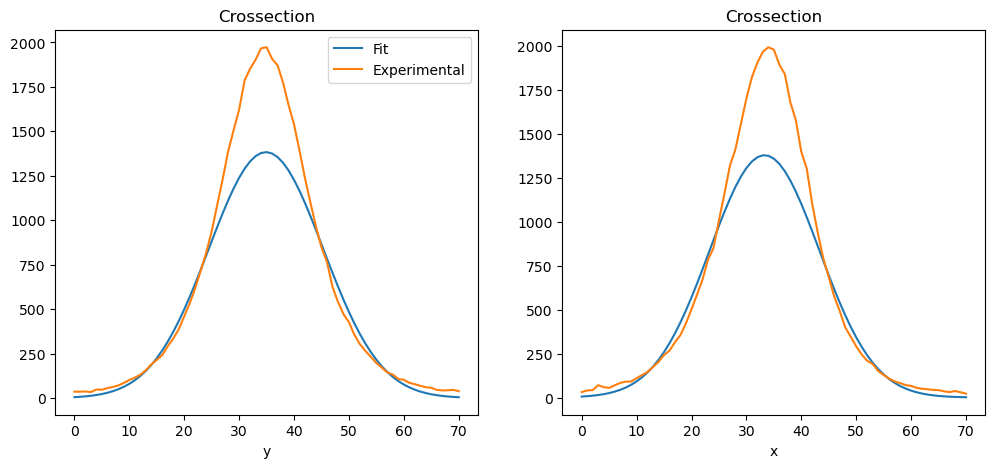

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa7e0ca4040>

In [33]:
x = round(Int64, mode_params.μ_x)
y = round(Int64, mode_params.μ_y)

img, ax = plt.subplots(1,2, figsize=(12,5))

ax[1].plot(image_reconstructed[x, :], label="Fit")
ax[1].plot(data[x, :], label="Experimental")
ax[1].legend()

ax[1].set_xlabel("y")
ax[1].set_title("Crossection")

ax[2].set_xlabel("x")
ax[2].set_title("Crossection")

ax[2].plot(image_reconstructed[:, y])
ax[2].plot(data[:, y])

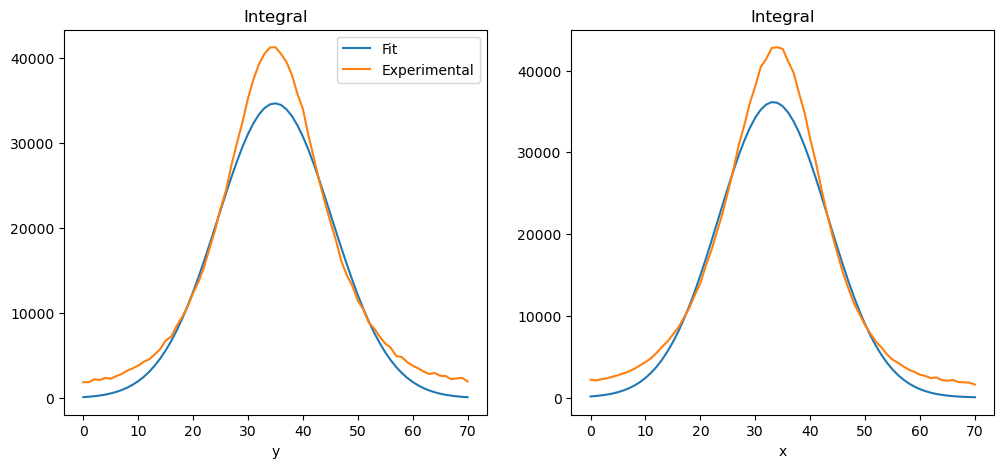

PyObject Text(0.5, 1.0, 'Integral')

In [34]:
img, ax = plt.subplots(1,2, figsize=(12,5))

ax[1].plot(sum(image_reconstructed, dims=1)[1,:], label="Fit")
ax[1].plot(sum(data, dims=1)[1,:], label="Experimental")

ax[1].legend()

ax[2].plot(sum(image_reconstructed, dims=2))
ax[2].plot(sum(data, dims=2))

ax[1].set_xlabel("y")
ax[1].set_title("Integral")

ax[2].set_xlabel("x")
ax[2].set_title("Integral")

# + pedestal:

In [42]:
log_likelihood_3 = let data = data,  c = cv_2_4
    
    params -> begin
        
        image_matrix = zeros(Float64, size(data)...)
        
        max_pred_amp::Int64 = size(c)[2]-1
        log_l::Float64 = 0.0
        
        for pix_ind in CartesianIndices(image_matrix)
    
            x_edge = pix_ind.I[1] 
            y_edge = pix_ind.I[2] 

            pix_prediction::Float64 = cdf(Normal(params.μ_x,params.σ_x), x_edge) - cdf(Normal(params.μ_x,params.σ_x), x_edge - 1)
            pix_prediction *= cdf(Normal(params.μ_y,params.σ_y), y_edge) - cdf(Normal(params.μ_y,params.σ_y), y_edge - 1)

            pix_prediction = pix_prediction*params.i + params.b
            
            cv_index = floor(Int64, pix_prediction)

            if cv_index > max_pred_amp
                cv_index = max_pred_amp
            end

            log_l += log(c[data[pix_ind]+1, cv_index+1])
            
        end

    
        return LogDVal(log_l)
        
    end
end

prior = NamedTupleDist(
    μ_x = 20 .. 50,
    μ_y = 20 .. 50,
    σ_x = 3 .. 20,
    σ_y = 3 .. 20,
    i = 1 .. 2^20,
    b = 0 .. 50
    );

In [36]:
posterior = PosteriorDensity(log_likelihood_3, prior);
algorithm = MetropolisHastings()

nsamples = 10^4
nchains = 4

@time samples = bat_sample(posterior, (nsamples, nchains), algorithm,
        max_nsteps = 10^4, max_time = 20).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ I

 35.241376 seconds (7.34 M allocations: 3.552 GiB, 2.83% gc time)


In [37]:
mode_params = mode(samples)[1]

(μ_x = 33.73608871430081, μ_y = 35.297573972173495, σ_x = 9.095149999063715, σ_y = 9.549917384829143, i = 855050.546481447, b = 6.773135494246814)

In [38]:
image_reconstructed = zeros(Float64, size(data)...)

for pix_ind in CartesianIndices(image_reconstructed)
    
    x_edge = pix_ind.I[1] 
    y_edge = pix_ind.I[2] 

    pix_prediction::Float64 = cdf(Normal(mode_params.μ_x,mode_params.σ_x), x_edge) - cdf(Normal(mode_params.μ_x,mode_params.σ_x), x_edge - 1)
    pix_prediction *= cdf(Normal(mode_params.μ_y,mode_params.σ_y), y_edge) - cdf(Normal(mode_params.μ_y,mode_params.σ_y), y_edge - 1)

    pix_prediction = pix_prediction*mode_params.i + mode_params.b
    image_reconstructed[pix_ind] = pix_prediction
end

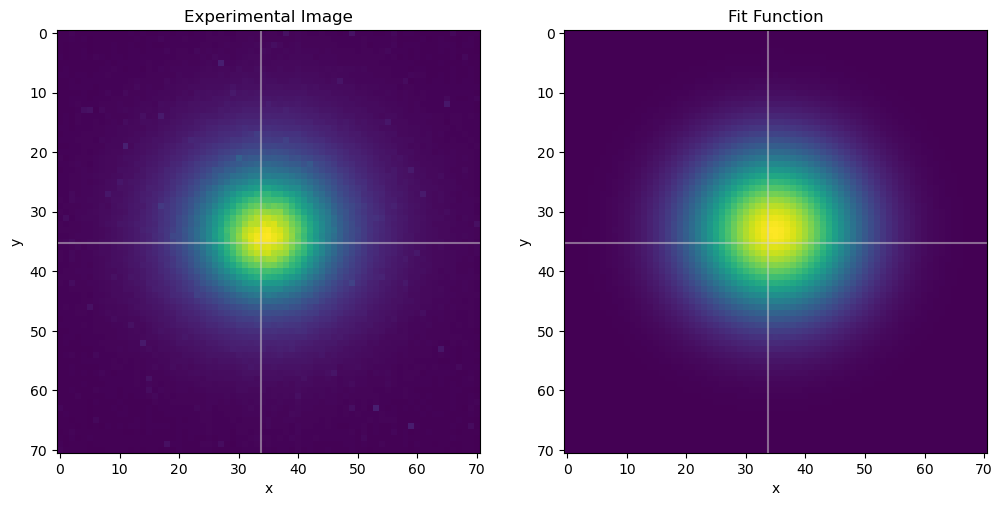

PyObject Text(0.5, 1.0, 'Fit Function')

In [39]:
img, (ax, ax2) = plt.subplots(1,2, figsize=(12,6))

ax.imshow(data)

ax.axvline(mode_params.μ_x, linestyle="-", color="lightgray", alpha=0.5)
ax.axhline(mode_params.μ_y, linestyle="-", color="lightgray", alpha=0.5)

ax2.imshow(image_reconstructed)

ax2.axvline(mode_params.μ_x, linestyle="-", color="lightgray", alpha=0.5)
ax2.axhline(mode_params.μ_y, linestyle="-", color="lightgray", alpha=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Experimental Image")

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Fit Function")

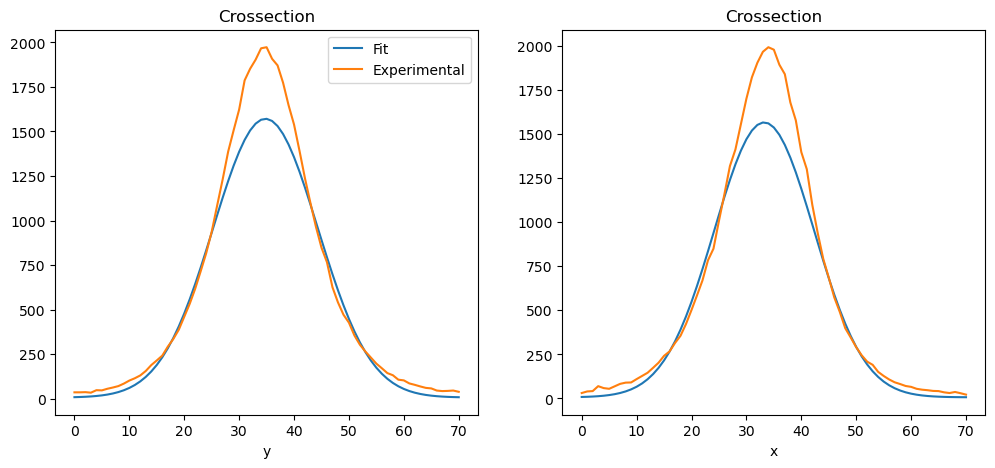

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa7e0735400>

In [40]:
x = round(Int64, mode_params.μ_x)
y = round(Int64, mode_params.μ_y)

img, ax = plt.subplots(1,2, figsize=(12,5))

ax[1].plot(image_reconstructed[x, :], label="Fit")
ax[1].plot(data[x, :], label="Experimental")
ax[1].legend()

ax[1].set_xlabel("y")
ax[1].set_title("Crossection")

ax[2].set_xlabel("x")
ax[2].set_title("Crossection")

ax[2].plot(image_reconstructed[:, y])
ax[2].plot(data[:, y])

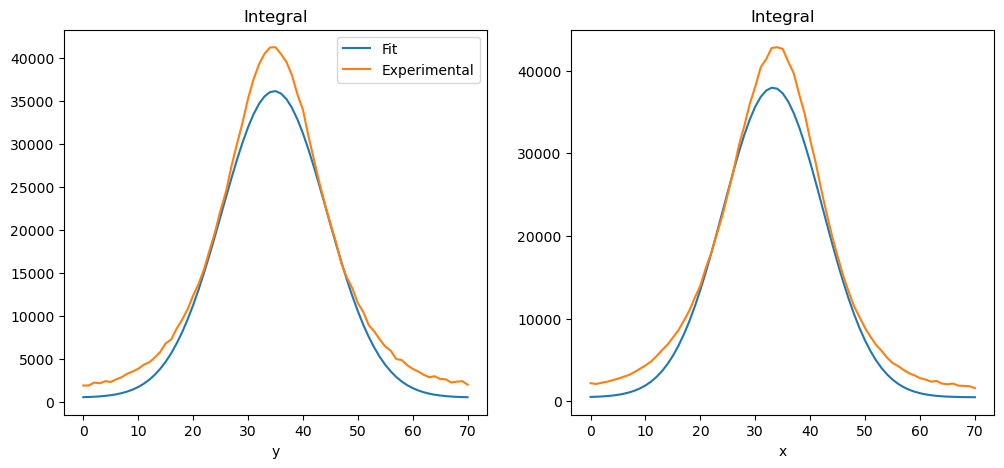

PyObject Text(0.5, 1.0, 'Integral')

In [41]:
img, ax = plt.subplots(1,2, figsize=(12,5))

ax[1].plot(sum(image_reconstructed, dims=1)[1,:], label="Fit")
ax[1].plot(sum(data, dims=1)[1,:], label="Experimental")

ax[1].legend()

ax[2].plot(sum(image_reconstructed, dims=2))
ax[2].plot(sum(data, dims=2))

ax[1].set_xlabel("y")
ax[1].set_title("Integral")

ax[2].set_xlabel("x")
ax[2].set_title("Integral")

# + pedestal + slope:

In [44]:
log_likelihood_3 = let data = data,  c = cv_2_4
    
    params -> begin
        
        image_matrix = zeros(Float64, size(data)...)
        
        max_pred_amp::Int64 = size(c)[2]-1
        log_l::Float64 = 0.0
        
        for pix_ind in CartesianIndices(image_matrix)
    
            x_edge = pix_ind.I[1] 
            y_edge = pix_ind.I[2] 

            pix_prediction::Float64 = cdf(Normal(params.μ_x,params.σ_x), x_edge) - cdf(Normal(params.μ_x,params.σ_x), x_edge - 1)
            pix_prediction *= cdf(Normal(params.μ_y,params.σ_y), y_edge) - cdf(Normal(params.μ_y,params.σ_y), y_edge - 1)

            pix_prediction = pix_prediction*params.i + params.b + params.s[1]*x_edge + params.s[2]*y_edge
            
            cv_index = floor(Int64, pix_prediction)

            if cv_index > max_pred_amp
                cv_index = max_pred_amp
            end

            log_l += log(c[data[pix_ind]+1, cv_index+1])
            
        end

    
        return LogDVal(log_l)
        
    end
end

prior = NamedTupleDist(
    μ_x = 20 .. 50,
    μ_y = 20 .. 50,
    σ_x = 3 .. 20,
    σ_y = 3 .. 20,
    i = 1 .. 2^20,
    b = 0 .. 50,
    s = [-5 .. 5, -5 .. 5]
    );

In [ ]:
posterior = PosteriorDensity(log_likelihood_3, prior);
algorithm = MetropolisHastings()

nsamples = 10^4
nchains = 4

@time samples = bat_sample(posterior, (nsamples, nchains), algorithm,
        max_nsteps = 10^4, max_time = 20).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44


In [37]:
mode_params = mode(samples)[1]

(μ_x = 33.73608871430081, μ_y = 35.297573972173495, σ_x = 9.095149999063715, σ_y = 9.549917384829143, i = 855050.546481447, b = 6.773135494246814)

In [38]:
image_reconstructed = zeros(Float64, size(data)...)

for pix_ind in CartesianIndices(image_reconstructed)
    
    x_edge = pix_ind.I[1] 
    y_edge = pix_ind.I[2] 

    pix_prediction::Float64 = cdf(Normal(mode_params.μ_x,mode_params.σ_x), x_edge) - cdf(Normal(mode_params.μ_x,mode_params.σ_x), x_edge - 1)
    pix_prediction *= cdf(Normal(mode_params.μ_y,mode_params.σ_y), y_edge) - cdf(Normal(mode_params.μ_y,mode_params.σ_y), y_edge - 1)

    pix_prediction = pix_prediction*mode_params.i + mode_params.b
    image_reconstructed[pix_ind] = pix_prediction
end

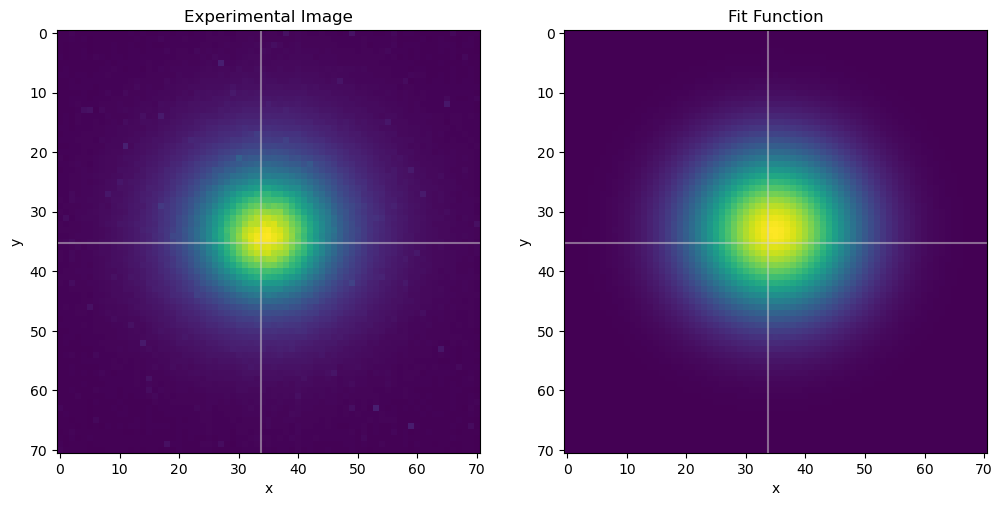

PyObject Text(0.5, 1.0, 'Fit Function')

In [39]:
img, (ax, ax2) = plt.subplots(1,2, figsize=(12,6))

ax.imshow(data)

ax.axvline(mode_params.μ_x, linestyle="-", color="lightgray", alpha=0.5)
ax.axhline(mode_params.μ_y, linestyle="-", color="lightgray", alpha=0.5)

ax2.imshow(image_reconstructed)

ax2.axvline(mode_params.μ_x, linestyle="-", color="lightgray", alpha=0.5)
ax2.axhline(mode_params.μ_y, linestyle="-", color="lightgray", alpha=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Experimental Image")

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Fit Function")

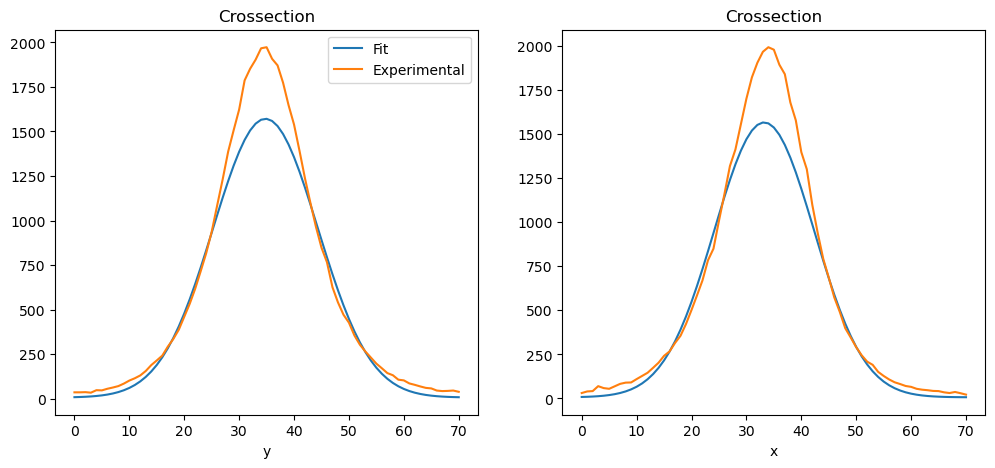

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa7e0735400>

In [40]:
x = round(Int64, mode_params.μ_x)
y = round(Int64, mode_params.μ_y)

img, ax = plt.subplots(1,2, figsize=(12,5))

ax[1].plot(image_reconstructed[x, :], label="Fit")
ax[1].plot(data[x, :], label="Experimental")
ax[1].legend()

ax[1].set_xlabel("y")
ax[1].set_title("Crossection")

ax[2].set_xlabel("x")
ax[2].set_title("Crossection")

ax[2].plot(image_reconstructed[:, y])
ax[2].plot(data[:, y])

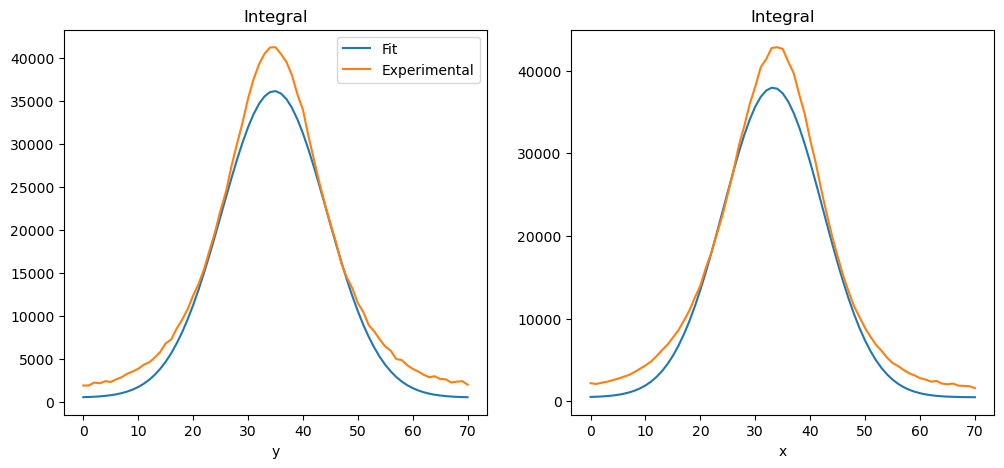

PyObject Text(0.5, 1.0, 'Integral')

In [41]:
img, ax = plt.subplots(1,2, figsize=(12,5))

ax[1].plot(sum(image_reconstructed, dims=1)[1,:], label="Fit")
ax[1].plot(sum(data, dims=1)[1,:], label="Experimental")

ax[1].legend()

ax[2].plot(sum(image_reconstructed, dims=2))
ax[2].plot(sum(data, dims=2))

ax[1].set_xlabel("y")
ax[1].set_title("Integral")

ax[2].set_xlabel("x")
ax[2].set_title("Integral")